# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [5]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [7]:
# TODO: view the shape of your data
transactions.shape


(1000000, 10)

In [9]:
# TODO: Begin your EDA
# Basic structure and summary
print("Shape of dataset:", transactions.shape)
print("\nData types and non-null counts:")
print(transactions.info())

print("\nSummary statistics for numeric features:")
print(transactions.describe())

Shape of dataset: (1000000, 10)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB
None

Summary statistics for numeric features:
             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  1.000000e+06   1.000000e+06    1.000000e+06    1.000000e+06   
mean   1.

In [10]:
# Check for missing values
print("\nMissing values per column:")
print(transactions.isnull().sum())


Missing values per column:
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


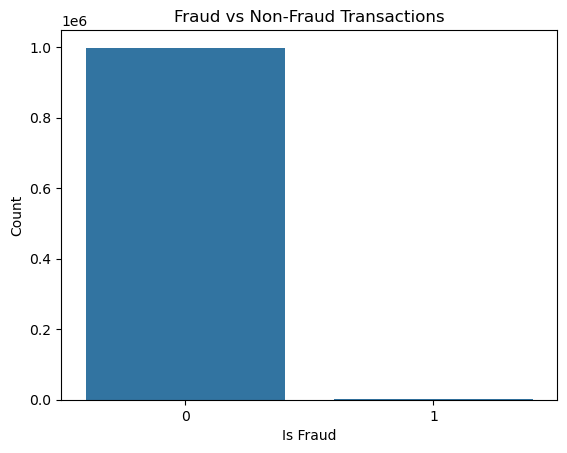

In [11]:
# Distribution of target variable
sns.countplot(x='isFraud', data=transactions)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

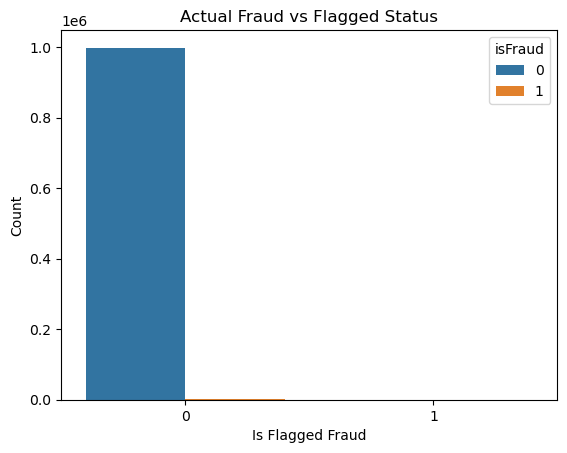

In [25]:
sns.countplot(x='isFlaggedFraud', hue='isFraud', data=transactions)
plt.title("Actual Fraud vs Flagged Status")
plt.xlabel("Is Flagged Fraud")
plt.ylabel("Count")
plt.show()


In [26]:
# Count combinations of isFraud and isFlaggedFraud
comparison = transactions.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')
print(comparison)


   isFraud  isFlaggedFraud   count
0        0               0  998703
1        1               0    1296
2        1               1       1


In [ ]:
# Filter and display fraudulent transactions
fraudulent_transactions = transactions[transactions['isFraud'] == 1]

# Display rows
fraudulent_transactions[['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                         'nameDest', 'oldbalanceDest', 'newbalanceDest']]


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
439,CASH_OUT,530354.58,C1119661582,530354.58,0.0,C1171953426,4728783.51,5259138.09
982,TRANSFER,5429153.98,C2027207246,5429153.98,0.0,C1388180627,0.00,0.00
1084,CASH_OUT,834592.40,C851101642,834592.40,0.0,C1583598303,236428.35,1071020.75
1903,TRANSFER,2763398.31,C577803442,2763398.31,0.0,C619602282,0.00,0.00
1912,TRANSFER,296699.39,C1746633930,296699.39,0.0,C1032143722,0.00,0.00
...,...,...,...,...,...,...,...,...
997527,TRANSFER,2571605.04,C991826252,2571605.04,0.0,C2045424554,0.00,0.00
997654,CASH_OUT,1421665.98,C467140343,1421665.98,0.0,C1583441435,0.00,1421665.98
998488,TRANSFER,349627.64,C246515037,349627.64,0.0,C1455585247,0.00,0.00
998998,CASH_OUT,1749325.14,C1029257629,1749325.14,0.0,C1200877577,1327198.86,3076524.00


In [32]:
# Save fraudulent transactions to a CSV file
fraudulent_transactions.to_csv('fraudulent_transactions.csv', index=False)


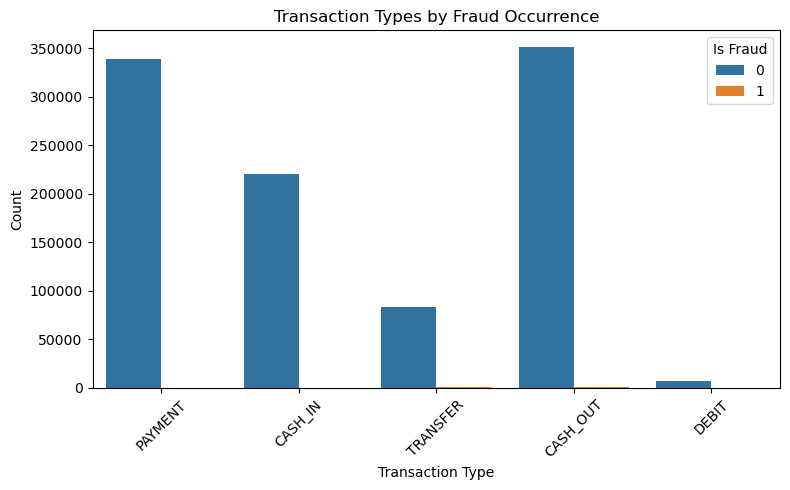

In [12]:
# Fraud Rate by Transaction Type

plt.figure(figsize=(8, 5))
sns.countplot(data=transactions, x='type', hue='isFraud')
plt.title('Transaction Types by Fraud Occurrence')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


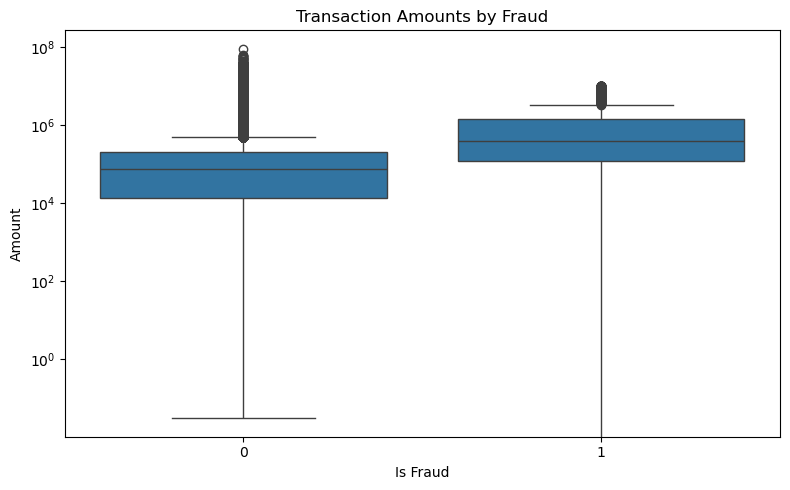

In [15]:
# Fraud Amounts vs Non-Fraud Amounts

plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='amount', data=transactions)
plt.title('Transaction Amounts by Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.yscale('log')  # use log scale due to extreme values
plt.tight_layout()
plt.show()


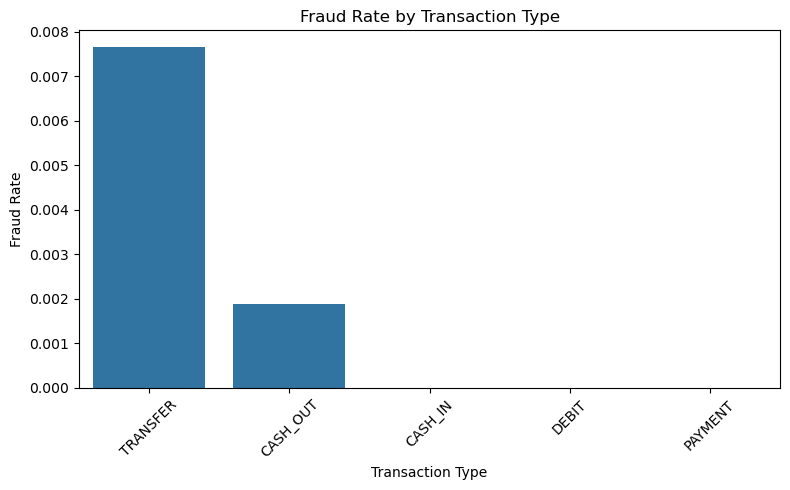

In [16]:
# Fraud Rate by Transaction Type (Proportional Comparison)

# Calculate fraud rate per transaction type
fraud_rate = transactions.groupby('type')['isFraud'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


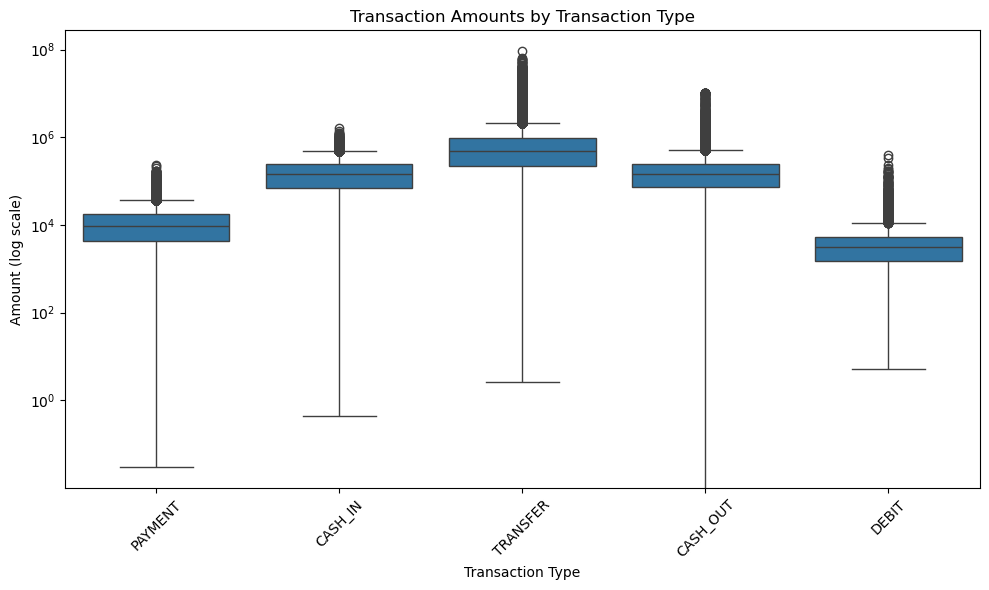

In [35]:
# Plotting transaction amounts by transaction type to compare how much money is typically moved in each category.
# This helps identify which types (like TRANSFER or CASH_OUT) involve larger sums and may be more vulnerable to fraud.

plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='amount', data=transactions)
plt.yscale('log')  # To handle wide range of amounts
plt.title("Transaction Amounts by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Amount (log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\colet\AppData\Local\Temp\ipykernel_29060\2103937968.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="Blues_d")


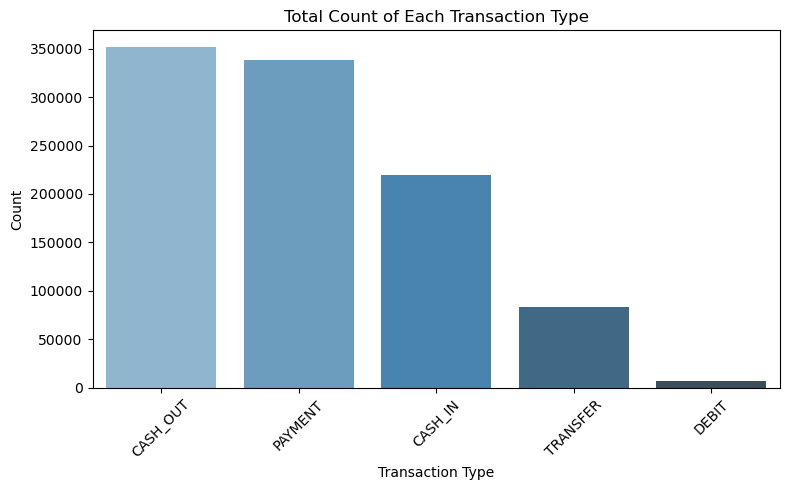

In [36]:
# Count the number of transactions by type
type_counts = transactions['type'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Blues_d")
plt.title('Total Count of Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\colet\AppData\Local\Temp\ipykernel_29060\3615069221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_amounts.index, y=type_amounts.values, palette="Oranges_d")


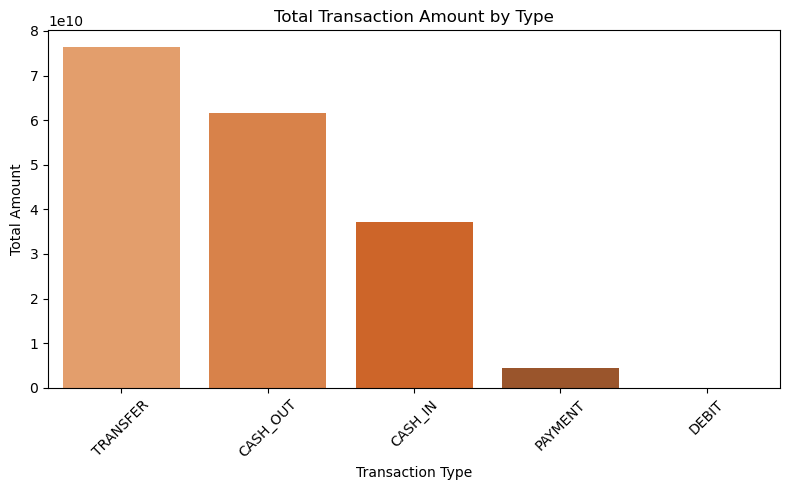

In [37]:
# Sum the transaction amounts by type
type_amounts = transactions.groupby('type')['amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=type_amounts.index, y=type_amounts.values, palette="Oranges_d")
plt.title('Total Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

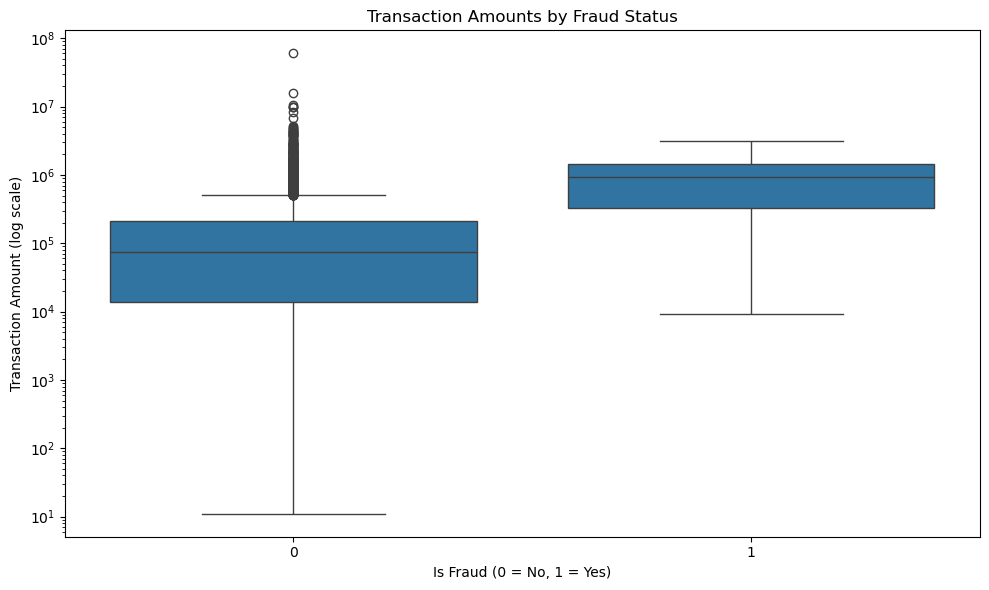

In [17]:
# Distribution of Amounts for Fraudulent vs Non-Fraudulent Transactions

plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='amount', data=transactions.sample(10000))
plt.yscale('log')  # Helps with skewed data
plt.title("Transaction Amounts by Fraud Status")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount (log scale)")
plt.tight_layout()
plt.show()


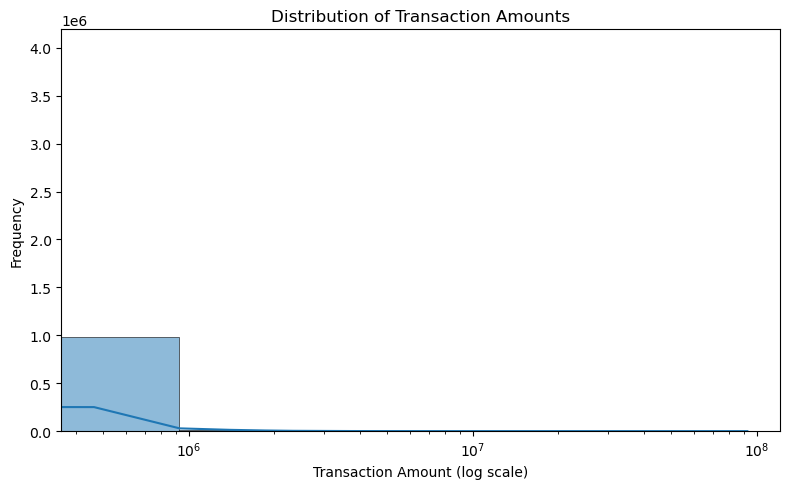

In [18]:
# Distribution of Transaction Amounts

plt.figure(figsize=(8,5))
sns.histplot(transactions['amount'], bins=100, kde=True)
plt.xscale('log')  # log scale helps manage skew
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount (log scale)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


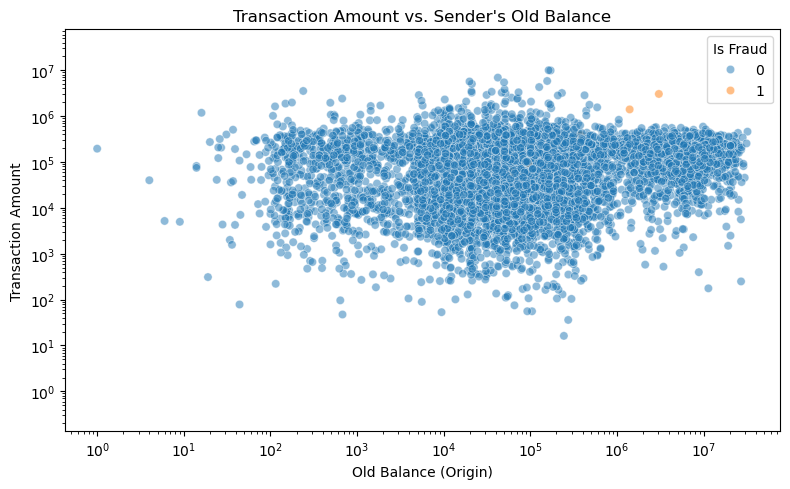

In [19]:
# Amount vs. Old Balance (Origin)

plt.figure(figsize=(8,5))
sns.scatterplot(data=transactions.sample(10000), x='oldbalanceOrg', y='amount', hue='isFraud', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Transaction Amount vs. Sender's Old Balance")
plt.xlabel("Old Balance (Origin)")
plt.ylabel("Transaction Amount")
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()


In [21]:
# Statistical Summary by Fraud Status

transactions.groupby('isFraud')[['amount', 'oldbalanceOrg', 'newbalanceOrig']].describe()


amount                                                           \
            count          mean           std   min         25%        50%   
isFraud                                                                      
0        998703.0  1.780941e+05  6.010807e+05  0.03   13345.495   74260.04   
1          1297.0  1.355199e+06  2.252516e+06  0.00  120411.900  407347.84   

                                 oldbalanceOrg                ...              \
                75%          max         count          mean  ...         75%   
isFraud                                                       ...               
0         207974.33  92445516.64      998703.0  8.342422e+05  ...   107047.00   
1        1425062.97  10000000.00        1297.0  1.509793e+06  ...  1425062.97   

                     newbalanceOrig                                         \
                 max          count           mean           std  min  25%   
isFraud                                                                      
0        38563401.41       998703.0  857419.971800  2.930086e+06  0.0  0.0   
1        39585040.37         1297.0  156144.249938  1.649550e+06  0.0  0.0   

                                       
         50%         75%          max  
isFraud                                
0        0.0  145171.395  38939424.03  
1        0.0       0.000  29585040.37  

[2 rows x 24 columns]

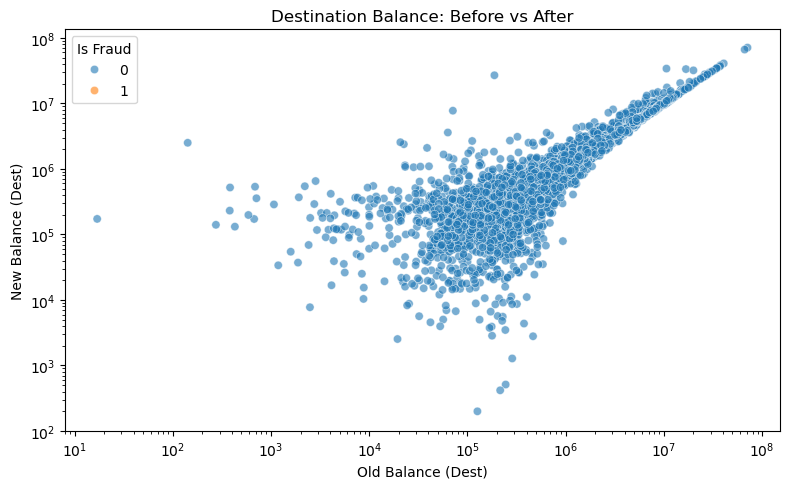

In [ ]:
# Destination Balance: Before vs After

plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions.sample(10000), x='oldbalanceDest', y='newbalanceDest', hue='isFraud', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Destination Balance: Before vs After")
plt.xlabel("Old Balance (Dest)")
plt.ylabel("New Balance (Dest)")
plt.legend(title='Is Fraud')
plt.tight_layout()
plt.show()


In [24]:
# Transactions where origin balance is zero but destination balance changes
suspicious = transactions[
    (transactions['oldbalanceOrg'] == 0) &
    (transactions['newbalanceOrig'] == 0) &
    (transactions['oldbalanceDest'] != transactions['newbalanceDest'])
]

suspicious.head()


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,TRANSFER,2357394.75,C458368123,0.0,0.0,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.0,0.0,C142246322,625317.04,693307.19,0,0
15,CASH_OUT,92011.56,C1974347422,0.0,0.0,C76835938,4691067.63,4783079.19,0,0
26,CASH_OUT,140094.87,C37262783,0.0,0.0,C1186157294,1026819.75,1166914.62,0,0
28,CASH_OUT,47818.29,C1948934235,0.0,0.0,C968040481,79985.40,127803.69,0,0


<Figure size 800x500 with 0 Axes>

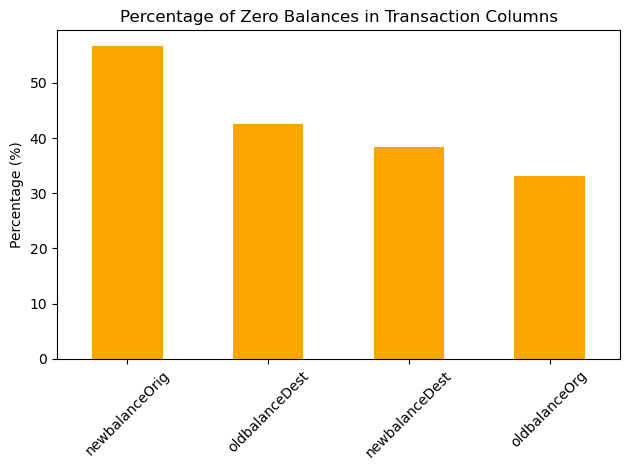

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Define balance columns to analyze
balance_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate the percentage of zero values in each column
zero_percentages = {
    col: (transactions[col] == 0).sum() / len(transactions) * 100 for col in balance_cols
}

# Convert the result into a DataFrame
zero_df = pd.DataFrame.from_dict(zero_percentages, orient='index', columns=['Zero Percentage'])
zero_df = zero_df.sort_values(by='Zero Percentage', ascending=False)

# Plot the zero percentages as a bar chart
plt.figure(figsize=(8, 5))
zero_df.plot(kind='bar', legend=False, color='orange')
plt.title("Percentage of Zero Balances in Transaction Columns")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# Group by transaction type and fraud status to calculate the average transaction amount
avg_amount_table = transactions.groupby(['type', 'isFraud'])['amount'].mean().reset_index()

# Rename columns for clarity
avg_amount_table.columns = ['Transaction Type', 'Is Fraud', 'Average Amount ($)']

# Round the average amount for readability
avg_amount_table['Average Amount ($)'] = avg_amount_table['Average Amount ($)'].round(2)

# Sort by transaction type
avg_amount_table = avg_amount_table.sort_values(by='Transaction Type')

# Display the table
avg_amount_table


,Transaction Type,Is Fraud,Average Amount ($)
0,CASH_IN,0,168928.91
1,CASH_OUT,0,173427.67
2,CASH_OUT,1,1326971.08
3,DEBIT,0,5445.89
4,PAYMENT,0,13055.59
5,TRANSFER,0,908187.36
6,TRANSFER,1,1384176.02


 ### EDA Summary ###

The transactions dataset contains 1,000,000 rows and 10 columns with no missing values. Because of its large size, I used a sample of 10,000 rows for some visualizations to make analysis easier.

Fraud cases in the dataset are very rare. Only 1,297 transactions were marked as fraud in the isFraud column, and just one of those was flagged by the system using the isFlaggedFraud column. This shows a major gap between actual fraud and what the system was able to detect.

Most fraud occurred in TRANSFER and CASH_OUT transactions and often involved high amounts. The median amount for fraudulent transactions was around 1,000,000 (based on the log-scaled plots). While most transactions were small, a few had extremely high values, so I used log scales to help interpret the plots more clearly.

Some records showed zero balances even though money was moved. This could be due to issues in how the data was recorded or may suggest suspicious activity.

Overall, I explored fraud distribution, transaction types, transaction amounts, balance behavior, and how well the system detects fraud.
 

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here: 
Most numeric features like amount, oldbalanceOrg, and newbalanceDest are right-skewed, meaning that most transactions have relatively small values, while a few have extremely high amounts. This was especially clear in the histogram and boxplots, where the majority of data clustered toward the lower end, and a long tail stretched to the right.

Using a log scale helped visualize this skew, revealing that while most transactions are likely routine (e.g., under 100,000), there are rare, high-value transactions reaching millions. These rare outliers are important to investigate further, as they are more commonly associated with fraudulent activity.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here:
When comparing numerical features, particularly amount versus oldbalanceOrg, I observed that fraudulent transactions tend to cluster at higher values. The scatter plot with log scales revealed that frauds mostly occurred when both the transaction amount and the sender's old balance were high, suggesting these were large, targeted transfers. Additionally, many fraudulent transactions involved a sender or recipient balance of zero, either before or after the transaction, which may point to suspicious behavior such as account drainage, takeovers, fake or inactive destination accounts, or possible data manipulation.

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Answer here:
When analyzing transaction types, I observed that although CASH_OUT and PAYMENT had the highest number of transactions overall, TRANSFER transactions had the highest total amount moved. This was followed by CASH_OUT, both of which involved large volumes of money despite lower counts compared to PAYMENT. The box plot further confirmed that TRANSFER, CASH_OUT, and CASH_IN transactions had higher medians and extreme outliers, indicating they often carry large sums. In contrast, DEBIT and PAYMENT had smaller typical amounts. These findings suggest that TRANSFER and CASH_OUT are the most financially significant transaction types and are likely preferred in high-value or potentially fraudulent activities.


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here:
Transaction amounts vary significantly when comparing fraudulent and non-fraudulent transactions by type. Fraudulent activity was concentrated in the TRANSFER and CASH_OUT categories, with average amounts exceeding 1.3 million dollars. In contrast, non-fraudulent transactions in these same categories averaged around 910,000 and 173,000 dollars respectively. Other transaction types such as PAYMENT, DEBIT, and CASH_IN had no recorded fraud cases, and their average amounts were much lower at approximately 13,000, 5,000, and 169,000 dollars. This pattern suggests that fraud tends to target high-value transactions that enable quick movement of large sums.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here:
The system’s fraud detection flag (isFlaggedFraud) is highly ineffective. Out of nearly 1,300 actual fraud cases identified using the isFraud column, only one was flagged by the system. This major mismatch indicates that the current fraud detection mechanism fails to catch nearly all fraudulent transactions, especially those involving large sums in the TRANSFER and CASH_OUT types. The system may need better rules, thresholds, or machine learning models to improve its accuracy.